# Data Exploration Notebook

Welcome to the data exploration notebook for our image classification project. The goal of this project is to develop a model that can accurately distinguish between images of **cars** and **bikes**.

This notebook is dedicated to gaining a deeper understanding of the dataset we'll be working with. We'll examine key aspects such as:

- The structure and organization of the dataset
- Distribution of classes (cars vs. bikes)
- Sample images from each class
- Image dimensions
- Brightness and intensity

By thoroughly exploring the dataset, we aim to identify patterns, inconsistencies, and insights that will guide the preprocessing, training, and evaluation stages of the project.

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
import pandas as pd

## Loading and Organizing the Dataset

To begin our exploration, we first import the necessary libraries and define the path to our dataset. The dataset consists of two categories: **Car** and **Bike**, each stored in separate folders.

We then iterate through these folders, collect the image file paths, and assign labels accordingly. This information is stored in a pandas DataFrame to facilitate easier analysis and visualization throughout the notebook.


In [2]:
# Set paths
dataset_path = '../data/processed/Car-Bike-Dataset'
classes = ['Car', 'Bike']

In [3]:
# Collect image file paths and labels
image_paths = []
labels = []

for cls in classes:
    cls_folder = os.path.join(dataset_path, cls)
    for file in os.listdir(cls_folder):
        if file.lower().endswith(('.png', '.jpg', '.jpeg')):
            image_paths.append(os.path.join(cls_folder, file))
            labels.append(cls)

# Create a DataFrame for easier analysis
df = pd.DataFrame({
    'image_path': image_paths,
    'label': labels
})

## Class Distribution

Before diving deeper, it's important to check the distribution of images across the two classes — **Car** and **Bike**. A balanced dataset ensures that the model doesn't become biased toward one class.

The bar plot below shows the number of images available for each class in the dataset.

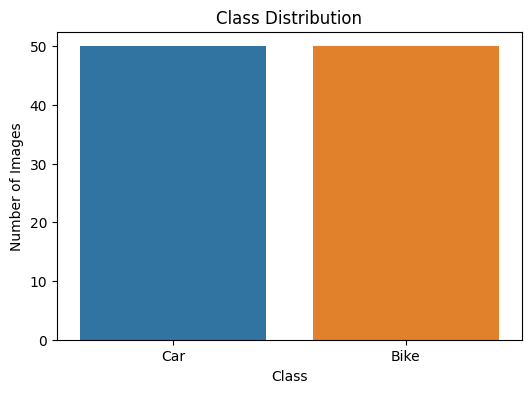

In [5]:
# Class Distribution
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='label', hue='label')
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Number of Images')
plt.show()

As we can see, the two classes are perfectly balanced. This means that we can rely on accuracy as our main evaluation metric for the model.

## Image Dimension Analysis

Image dimensions can vary significantly in datasets collected from different sources. Before any preprocessing or model training, it's helpful to understand the distribution of image sizes.

In this section, we extract the **width** and **height** of each image and visualize their distributions using boxplots. This helps us identify:

- The typical image sizes per class (Car vs. Bike)
- Any significant outliers or inconsistencies
- Whether resizing will be necessary for model input consistency

The plots below show the spread of image widths and heights for each class.


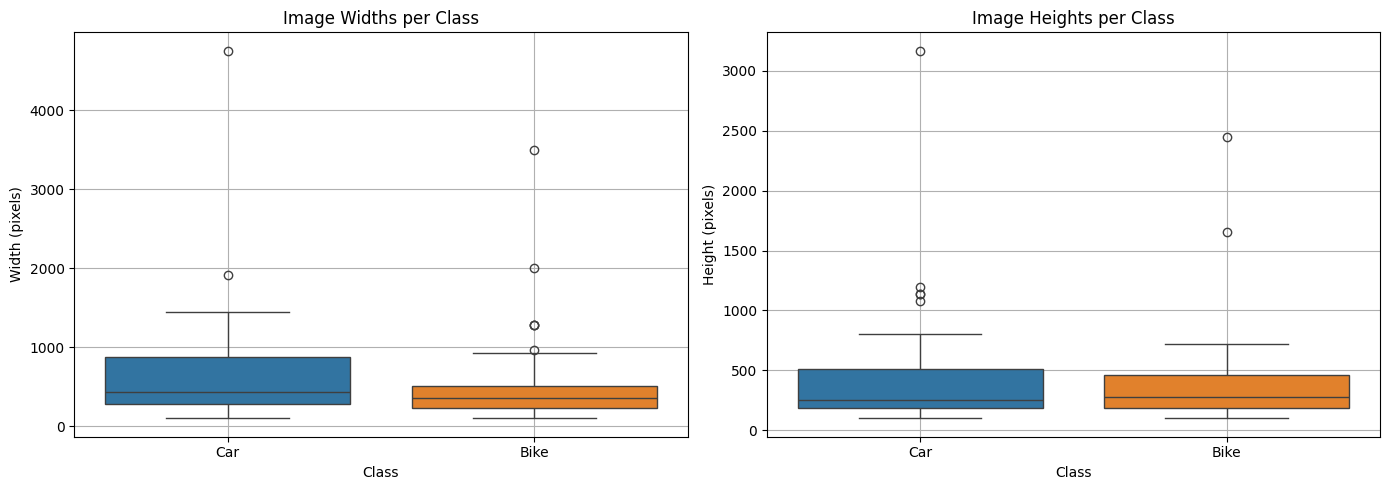

In [6]:
# Image Dimensions per class
widths = []
heights = []

for path in df['image_path']:
    with Image.open(path) as img:
        widths.append(img.width)
        heights.append(img.height)

df['width'] = widths
df['height'] = heights

# Plot boxplots per class
plt.figure(figsize=(14,5))

# Width boxplot
plt.subplot(1,2,1)
sns.boxplot(x='label', y='width', data=df, hue='label')
plt.title('Image Widths per Class')
plt.xlabel('Class')
plt.ylabel('Width (pixels)')
plt.grid(True)

# Height boxplot
plt.subplot(1,2,2)
sns.boxplot(x='label', y='height', data=df, hue='label')
plt.title('Image Heights per Class')
plt.xlabel('Class')
plt.ylabel('Height (pixels)')
plt.grid(True)

plt.tight_layout()
plt.show()

We can see that the image widths differ quite a bit per class, while the image height are more similar. Also, we see that there are some outliers.

## Image Aspect Ratio Visualization

To better understand the shape and proportions of the images, we plot a scatter plot of **width vs. height**, colored by class label.

This visualization helps us observe:

- Common aspect ratios within each class
- Whether one class tends to have wider or taller images
- The overall spread and clustering of image dimensions

Consistent aspect ratios across classes are ideal, especially when resizing images for model input. If there's too much variation, we may need to decide on a standard resizing strategy that minimizes distortion.


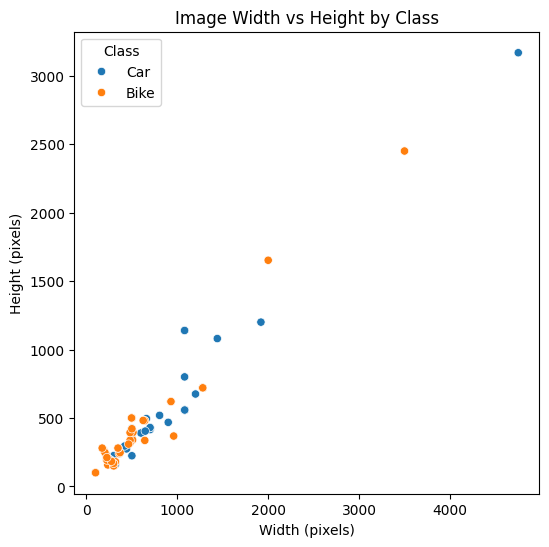

In [7]:
# Scatter plot of width vs height
plt.figure(figsize=(6,6))
sns.scatterplot(x='width', y='height', hue='label', data=df)
plt.title('Image Width vs Height by Class')
plt.xlabel('Width (pixels)')
plt.ylabel('Height (pixels)')
plt.legend(title='Class')
plt.show()

Here we can see that most of the dots are clumped together at the bottom left corner. This is due to the outliers' influence. Still, we see that, for the most part, the height-width points stay in the diagonal of the plot, which means the images generally maintain a consistent aspect ratio. Taller images tend to be wider as well, indicating proportional scaling across most samples.

## Sample Images from Each Class

Visual inspection is a crucial part of dataset exploration. It helps us assess:

- The visual quality of the images
- Any inconsistencies or anomalies (e.g. wrong labels, blurriness, noise)
- The typical appearance of each class

Below, we display the first 5 images from each class (**Car** and **Bike**) to get an initial sense of what the model will be learning from.

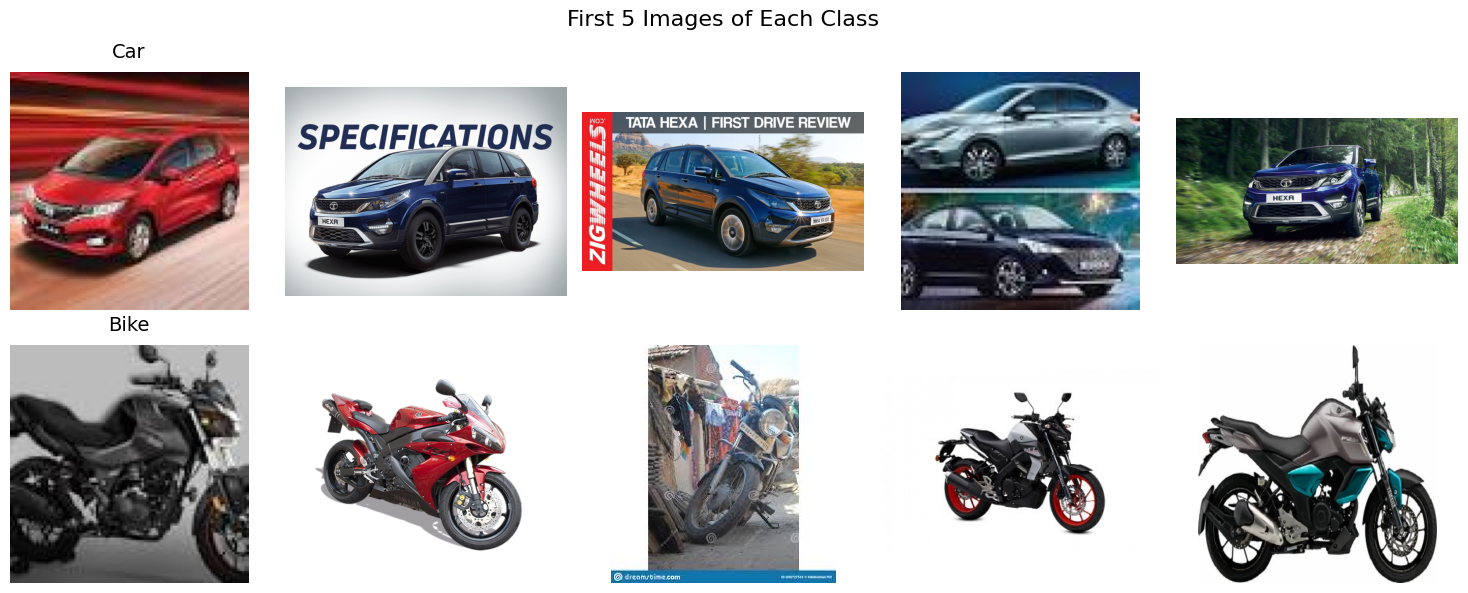

In [8]:
# Sample images per class
plt.figure(figsize=(15, 6))

for i, cls in enumerate(classes):
    # Get the first `num_samples` images for this class
    sample_paths = df[df['label'] == cls]['image_path'].iloc[:5]
    
    for j, path in enumerate(sample_paths):
        ax = plt.subplot(len(classes), 5, i*5 + j + 1)
        with Image.open(path) as img:
            plt.imshow(img)
            plt.axis('off')
            if j == 0:
                ax.set_title(cls, fontsize=14, pad=10)
                
plt.suptitle('First 5 Images of Each Class', fontsize=16)
plt.tight_layout()
plt.show()

## Average Image per Class

To get a sense of the common visual patterns within each class, we compute and display the **average image** for both Cars and Bikes.

Each image is resized to a standard shape of 224×224 pixels, converted to RGB, and then averaged pixel-wise across all samples in the class.

This visualization helps us understand:

- The general shape or silhouette of objects in each class
- Background or color consistency
- Visual noise or variation within each class

While the average image may look blurry, it can still reveal class-specific characteristics (e.g., where wheels or body shapes typically appear).

/home/alumno/Desktop/datos/SoftwareDevelopmentOrientedToML/Project_SOML_Karim_Paula/.venv/lib/python3.13/site-packages/PIL/Image.py:1047: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


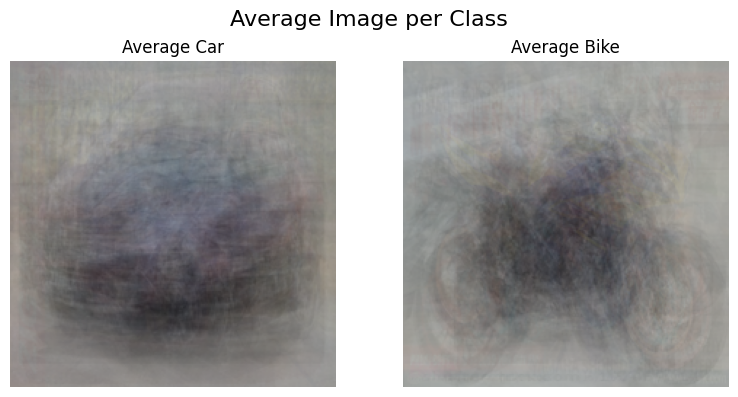

In [9]:
# Average Image per Class

common_size = (224, 224)  # (width, height)

plt.figure(figsize=(8,4))

for i, cls in enumerate(classes):
    class_paths = df[df['label'] == cls]['image_path']
    imgs = []
    
    for path in class_paths:
        with Image.open(path) as img:
            img = img.convert('RGB')
            img = img.resize(common_size)  # Resize to common size
            imgs.append(np.array(img, dtype=np.float32))
    
    # Compute average image
    avg_img = np.mean(imgs, axis=0).astype(np.uint8)
    
    # Display
    plt.subplot(1, len(classes), i+1)
    plt.imshow(avg_img)
    plt.axis('off')
    plt.title(f'Average {cls}')

plt.suptitle('Average Image per Class', fontsize=16)
plt.tight_layout()
plt.show()

We see that the average image is pretty blurry, which might suggest that the variation in the images within one class is big. This might affect the model's performance and ability to separate the classes.

## Image Brightness Analysis

Lighting conditions can significantly affect how models interpret images. To explore this aspect, we calculate the **average brightness** of each image by converting it to grayscale and computing the mean pixel intensity.

We then visualize the distribution of brightness values per class using boxplots. This helps us identify:

- Whether one class tends to be brighter or darker
- Any significant outliers (e.g. underexposed or overexposed images)
- The need for brightness normalization or augmentation during preprocessing

Consistent brightness across classes is ideal, but if discrepancies exist, we may consider adjustments in preprocessing.


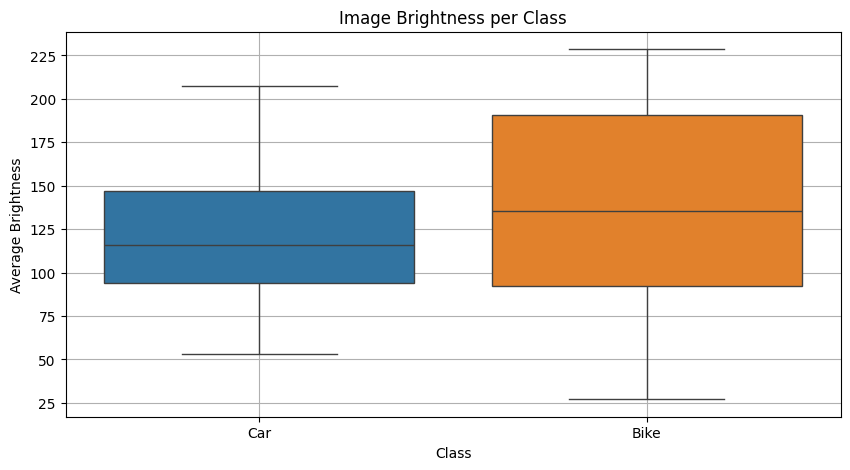

In [10]:
# Average brightness per class

# Compute average brightness per image
brightness_list = []

for _, row in df.iterrows():
    with Image.open(row['image_path']) as img:
        img_gray = img.convert('L')  # Convert to grayscale
        brightness = np.array(img_gray, dtype=np.float32).mean()
        brightness_list.append(brightness)

# Add to dataframe
df['brightness'] = brightness_list

# Plot brightness per class
plt.figure(figsize=(10,5))
sns.boxplot(x='label', y='brightness', data=df, hue='label')
plt.title('Image Brightness per Class')
plt.xlabel('Class')
plt.ylabel('Average Brightness')
plt.grid(True)
plt.show()

As we can see, the brightness values for cars show less variation, while bikes exhibit a wider range of brightness levels. This difference in brightness distribution might be a useful feature to help differentiate between the two classes.

## Color Channel Intensity Analysis

Color information can be a strong discriminative feature when classifying images. To explore this, we calculate the average pixel intensity for each color channel (**Red, Green, Blue**) across all images.

The histograms below show the distribution of average intensities per channel for both **Car** and **Bike** classes. 

This helps us understand:

- If certain color channels differ systematically between classes
- The overall color composition tendencies within each class
- Potential color-based features or preprocessing steps (e.g., color normalization)

Observing overlaps and separations in these distributions can guide feature engineering and model input strategies.

/home/alumno/Desktop/datos/SoftwareDevelopmentOrientedToML/Project_SOML_Karim_Paula/.venv/lib/python3.13/site-packages/PIL/Image.py:1047: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


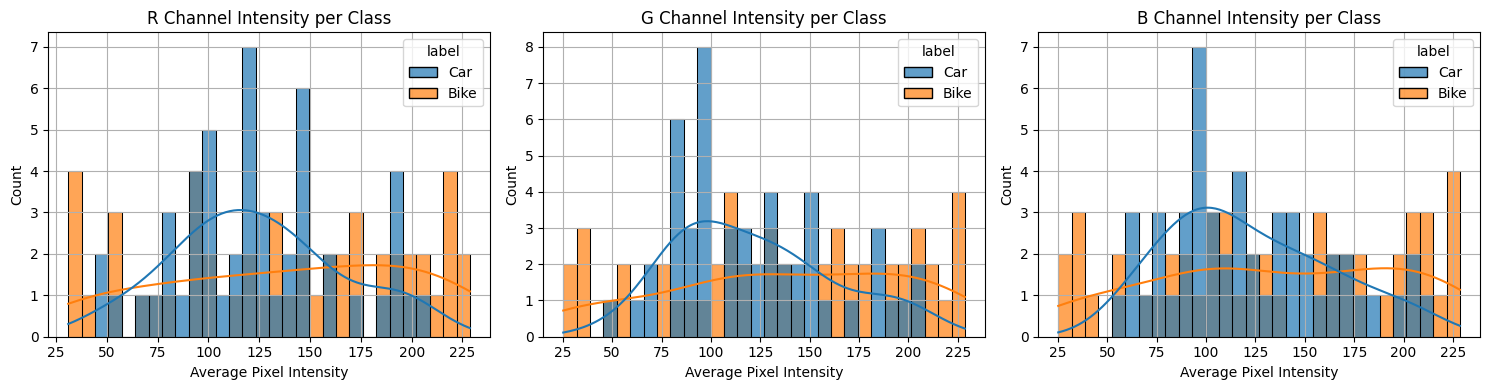

In [11]:
# Average intensity per color channel per image

avg_r, avg_g, avg_b, labels = [], [], [], []

for _, row in df.iterrows():
    with Image.open(row['image_path']) as img:
        img = img.convert('RGB')
        arr = np.array(img, dtype=np.float32)
        avg_r.append(arr[:,:,0].mean())
        avg_g.append(arr[:,:,1].mean())
        avg_b.append(arr[:,:,2].mean())
        labels.append(row['label'])

# Create DataFrame
import pandas as pd
channel_df = pd.DataFrame({
    'R': avg_r,
    'G': avg_g,
    'B': avg_b,
    'label': labels
})

# Plot histograms per channel per class
plt.figure(figsize=(15,4))

for i, channel in enumerate(['R','G','B']):
    plt.subplot(1,3,i+1)
    sns.histplot(data=channel_df, x=channel, hue='label', bins=30, kde=True, alpha=0.7)
    plt.title(f'{channel} Channel Intensity per Class')
    plt.xlabel('Average Pixel Intensity')
    plt.ylabel('Count')
    plt.grid(True)

plt.tight_layout()
plt.show()

# Conclusion

In this exploratory analysis, we examined the structure and characteristics of our Car vs. Bike image dataset. Key takeaways include:

- The dataset contains a balanced number of images per class, reducing initial bias concerns.
- Images generally maintain consistent aspect ratios, though some outliers exist.
- Visual inspection of sample images confirms clear differences between the classes.
- Average images per class reveal typical shapes and color patterns unique to cars and bikes.
- Brightness analysis showed that cars have a narrower brightness range, while bikes exhibit more variation, which might help classification.
- Color channel intensity distributions suggest potential differences in color composition that can be leveraged.

Overall, these insights provide a solid foundation for preprocessing, augmentation, and model design decisions. Next steps will focus on preparing the data and building classification models informed by this analysis.